In [1]:
import re
import subprocess

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
output = subprocess.check_output(["go.exe", "test", "-test.bench=.*",]).decode()


In [4]:
values = [ [] for i in range(4) ]

for l in output.split('\n'):
    match = re.search('BenchmarkFib(\d).*\s.*\s(\d*.+\d+) ns/op', l)
    if match:
        index = int(match.group(1)) - 1
        values[index].append(float(match.group(2)) / 1e6)

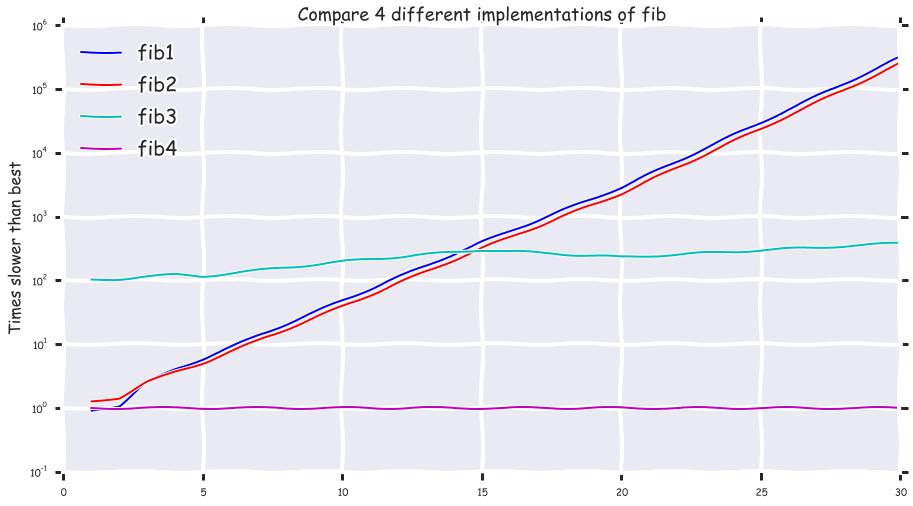

In [18]:
with plt.xkcd():
    fig = plt.figure(figsize=(15, 8))
    X = [1, 2, 3, 4, 5, 10, 15, 20, 30]
    for i in range(4):
        plt.plot(X, [c/b for b, c in zip(values[3], values[i])], label='fib%d' % (i+1))
    fig.gca().set_yscale('log')
    plt.legend(fontsize=20, loc='best')
    plt.ylabel('Times slower than best', fontsize=16)
    plt.title('Compare 4 different implementations of fib', fontsize=18)